In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

In [7]:
credit_card_data = pd.read_csv(r"/content/CC.csv")

In [8]:
credit_card_data

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,2,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,3,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,4,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,5,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,1954,1505,-1.589189,1.768097,0.903829,-0.722368,-0.402301,-0.805884,0.167423,-0.440052,...,0.564965,-0.614670,0.085545,0.420550,-0.039584,0.306702,0.427817,0.249615,1.00,0.0
1954,1955,1506,-1.586551,-0.160712,1.016474,0.808093,0.959520,0.085747,1.226304,-0.395457,...,-0.166646,0.824710,0.705268,-0.291445,0.003099,-0.288588,0.420021,-0.389301,99.93,0.0
1955,1956,1506,1.238569,0.207420,-0.022440,1.052196,0.341801,0.351660,0.069760,0.027849,...,-0.143995,-0.220770,-0.260700,-0.811124,0.881769,-0.289689,0.021560,-0.000476,12.99,0.0
1956,1957,1506,-2.003238,1.568115,0.473887,-0.735266,-0.633109,-0.387189,-0.184267,0.815683,...,0.007657,-0.330897,0.026381,-0.000287,-0.161481,0.287249,-0.755515,0.017640,5.00,0.0


In [9]:
ccd = credit_card_data

In [10]:
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1958 non-null   int64  
 1   Time        1958 non-null   int64  
 2   V1          1958 non-null   float64
 3   V2          1958 non-null   float64
 4   V3          1958 non-null   float64
 5   V4          1958 non-null   float64
 6   V5          1958 non-null   float64
 7   V6          1958 non-null   float64
 8   V7          1958 non-null   float64
 9   V8          1958 non-null   float64
 10  V9          1958 non-null   float64
 11  V10         1958 non-null   float64
 12  V11         1958 non-null   float64
 13  V12         1958 non-null   float64
 14  V13         1958 non-null   float64
 15  V14         1958 non-null   float64
 16  V15         1958 non-null   float64
 17  V16         1958 non-null   float64
 18  V17         1958 non-null   float64
 19  V18         1958 non-null  

In [11]:
ccd.isnull().sum()

Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           1
V28           1
Amount        1
Class         1
dtype: int64

In [12]:
ccd['Class'].value_counts()

0.0    1955
1.0       2
Name: Class, dtype: int64

Class
0.0    99.897803
1.0     0.102197
Name: Class, dtype: float64


<Axes: ylabel='Class'>

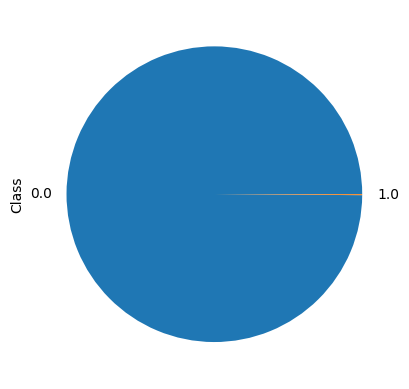

In [13]:
print((ccd.groupby('Class')['Class'].count()/ccd['Class'].count())*100)
((ccd.groupby('Class')['Class'].count()/ccd['Class'].count())*100).plot.pie()

In [14]:
classes = ccd['Class'].value_counts()
normal_value = round(classes[0]/ccd['Class'].count()*100,2)
fraud_values = round(classes[1]/ccd['Class'].count()*100,2)
print(normal_value)
print(fraud_values)

99.9
0.1


In [15]:
corr = ccd.corr()
corr

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Unnamed: 0,1.000000,0.999848,-0.076623,0.052068,-0.017422,-0.105510,-0.050739,-0.096716,0.021277,-0.008626,...,-0.010300,-0.066727,-0.006498,0.021321,-0.024318,0.061793,0.032832,0.058044,-0.005366,-0.022420
Time,0.999848,1.000000,-0.076483,0.051851,-0.017893,-0.105336,-0.050390,-0.096678,0.021768,-0.008289,...,-0.009931,-0.065899,-0.006063,0.021380,-0.023792,0.061558,0.033153,0.058006,-0.005407,-0.022357
V1,-0.076623,-0.076483,1.000000,-0.161107,-0.165912,0.213913,-0.052903,-0.060914,-0.279115,0.180653,...,-0.109648,-0.050221,-0.104800,0.004224,0.333322,-0.039929,-0.091692,0.064585,-0.244070,-0.056821
V2,0.052068,0.051851,-0.161107,1.000000,0.061381,-0.000549,0.199167,-0.131144,0.032815,-0.098277,...,0.096486,-0.107073,0.023055,-0.003139,-0.186556,-0.063532,0.092151,-0.058894,-0.510916,-0.024223
V3,-0.017422,-0.017893,-0.165912,0.061381,1.000000,0.114770,0.109388,-0.195304,-0.172843,0.018475,...,0.043076,0.263284,0.061659,0.058180,-0.325447,0.066436,-0.230041,-0.230610,-0.339945,-0.034915
V4,-0.105510,-0.105336,0.213913,-0.000549,0.114770,1.000000,-0.115909,0.119286,0.086308,0.112933,...,-0.094894,0.096617,0.019054,0.035807,0.059468,-0.073191,0.015203,0.112355,0.118717,0.075365
V5,-0.050739,-0.050390,-0.052903,0.199167,0.109388,-0.115909,1.000000,-0.059204,-0.383957,0.142273,...,0.068525,-0.129384,0.056061,-0.063893,-0.073552,-0.131765,-0.204445,-0.268566,-0.623151,0.012348
V6,-0.096716,-0.096678,-0.060914,-0.131144,-0.195304,0.119286,-0.059204,1.000000,0.202325,0.007376,...,-0.013123,0.042546,-0.125408,-0.025967,0.073200,0.032275,0.061917,0.093963,0.409669,-0.032589
V7,0.021277,0.021768,-0.279115,0.032815,-0.172843,0.086308,-0.383957,0.202325,1.000000,-0.130634,...,-0.222146,0.039224,-0.112271,0.021587,-0.115168,-0.011906,0.088801,0.028239,0.660066,-0.034638
V8,-0.008626,-0.008289,0.180653,-0.098277,0.018475,0.112933,0.142273,0.007376,-0.130634,1.000000,...,-0.333773,0.079873,-0.021144,-0.021236,0.002492,0.048033,0.093041,0.147719,-0.163104,0.023958


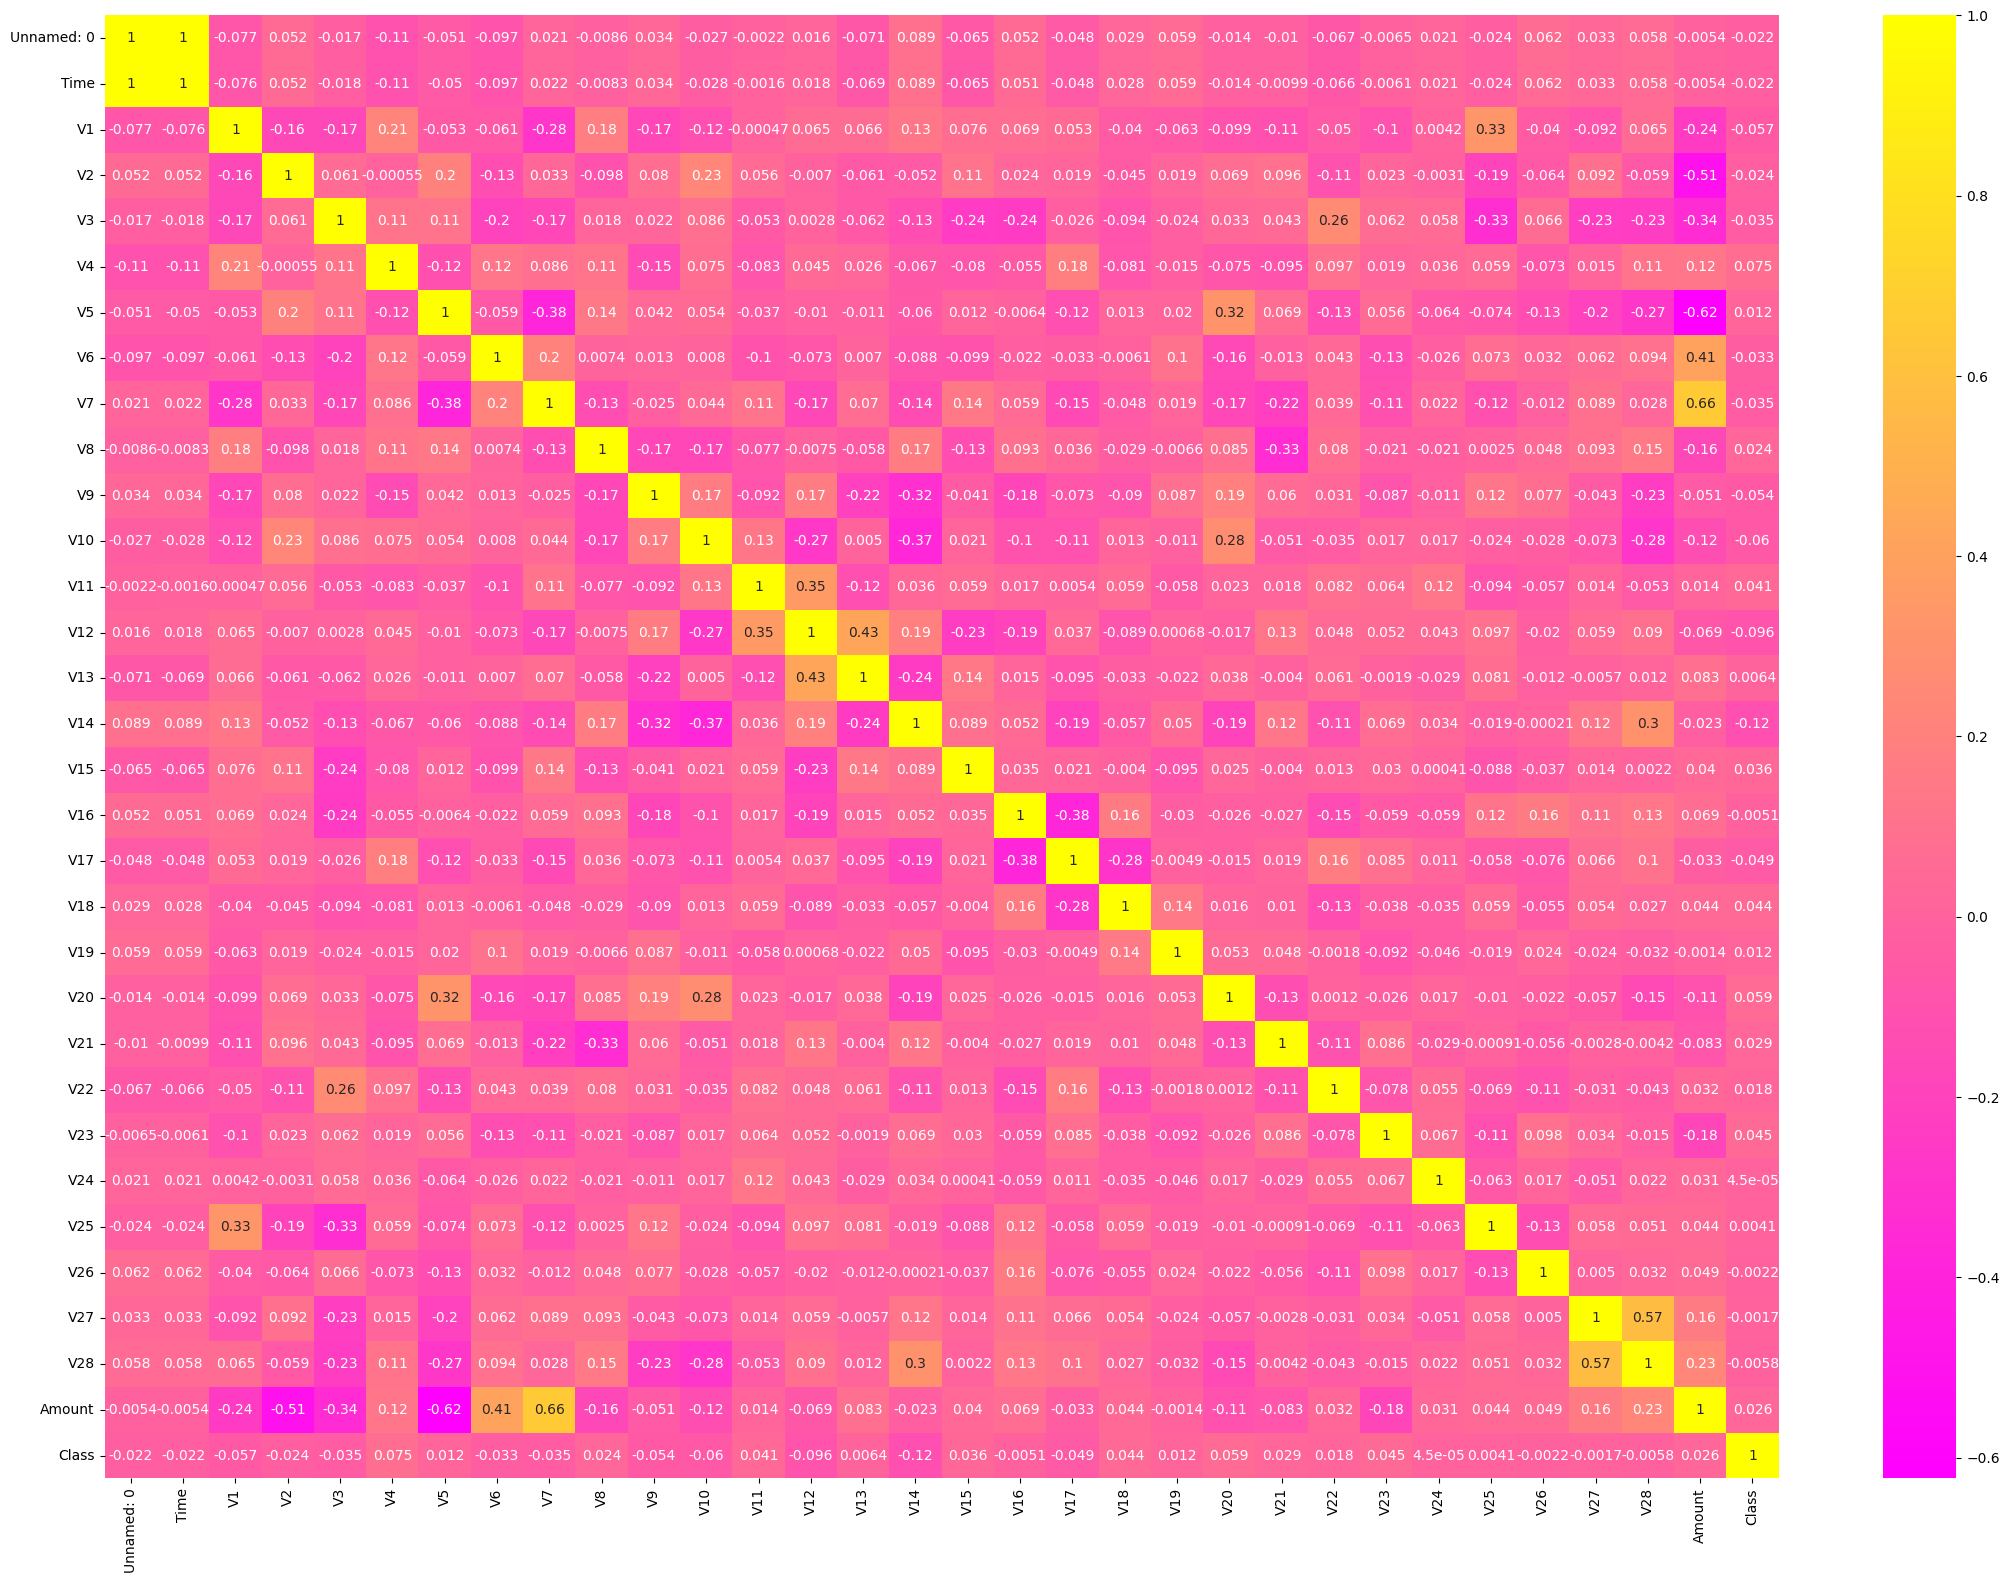

In [16]:
# plotting the heatmap for the correlation
plt.figure(figsize=(27,19))
sns.heatmap(corr, cmap = 'spring', annot= True )
plt.show()

In [17]:
legit = ccd[ccd.Class == 0]

In [18]:
fraud = ccd[ccd.Class==1]

In [19]:
legit.Amount.describe()

count    1955.000000
mean       68.630056
std       242.049027
min         0.000000
25%         4.990000
50%        15.300000
75%        64.000000
max      7712.430000
Name: Amount, dtype: float64

In [20]:
fraud.Amount.describe()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64

In [21]:
ccd.groupby('Class').describe()

Unnamed: 0                                                               \
           count        mean         std    min    25%    50%     75%     max   
Class                                                                           
0.0       1955.0  979.405115  565.227042    1.0  489.5  980.0  1468.5  1957.0   
1.0          2.0  583.000000   57.982756  542.0  562.5  583.0   603.5   624.0   

         Time              ...       V28            Amount              \
        count        mean  ...       75%       max   count        mean   
Class                      ...                                           
0.0    1955.0  750.178005  ...  0.089309  4.157934  1955.0   68.630056   
1.0       2.0  439.000000  ... -0.008996  0.035764     2.0  264.500000   

                                                        
              std  min     25%    50%     75%      max  
Class                                                   
0.0    242.049027  0.0    4.99   15.3   64.00  7712.43  
1.0    374.059487  0.0  132.25  264.5  396.75   529.00  

[2 rows x 248 columns]

In [22]:
ccd.groupby('Class').mean()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,979.405115,750.178005,-0.272723,0.257772,0.850290,0.155544,-0.074708,0.057580,0.138195,-0.065379,...,0.054265,-0.010084,-0.139797,-0.043792,0.012355,0.109337,0.048057,0.024221,-0.003891,68.630056
1.0,583.000000,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


In [23]:
normal_sample = legit.sample(n=492)

In [24]:
new_dataset = pd.concat([normal_sample, fraud], axis = 0) # axis =0 species row wise joining of the datasets l

In [25]:
new_dataset

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1195,1196,927,1.040094,-1.719288,1.556730,-0.080816,-2.156667,0.754853,-1.708567,0.360145,...,0.307719,0.990798,-0.352216,-0.050625,0.535660,0.117422,0.074743,0.048505,150.00,0.0
880,881,666,-0.794271,0.971305,0.943319,-0.043722,-0.258737,-0.333043,0.564873,0.543874,...,-0.214068,-0.974297,0.426295,0.142414,-0.911745,-0.237001,-0.035277,0.088817,64.63,0.0
1792,1793,1395,-0.792839,1.098424,0.617479,0.707670,0.940219,-0.439780,1.735843,-0.728397,...,-0.217902,0.272610,-0.230941,-0.079606,-0.106819,-0.422594,0.158896,-0.223086,92.30,0.0
1901,1902,1468,-2.445055,-3.368753,1.568048,-0.551750,2.646792,-1.016805,-1.751238,0.333655,...,-0.013940,-0.339042,0.418651,-1.382706,-0.009750,0.404602,-0.174552,-0.047706,85.06,0.0
1257,1258,972,1.142910,0.190771,1.285610,2.595766,-0.569463,0.456425,-0.572937,0.211889,...,-0.118423,-0.220950,-0.026753,-0.158161,0.356538,-0.010547,0.038437,0.031605,10.86,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,825,630,1.315818,0.407945,-0.023868,0.486155,0.131546,-0.567519,0.140781,-0.210138,...,-0.330541,-0.898109,0.012714,-0.466751,0.363822,0.142918,-0.017303,0.024611,1.98,0.0
400,401,290,-0.695818,0.581773,2.378180,0.063396,0.329119,-0.449865,1.269104,-0.758363,...,-0.327948,-0.369683,-0.426987,0.420170,0.235207,0.194957,-0.708471,-0.621219,30.50,0.0
467,468,343,1.004760,0.423992,0.579929,2.476754,-0.124375,-0.363936,0.297698,-0.104342,...,0.128929,0.195254,-0.119654,0.557573,0.516518,-0.004221,-0.028055,0.025729,75.83,0.0
541,542,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0


In [26]:
new_dataset

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1195,1196,927,1.040094,-1.719288,1.556730,-0.080816,-2.156667,0.754853,-1.708567,0.360145,...,0.307719,0.990798,-0.352216,-0.050625,0.535660,0.117422,0.074743,0.048505,150.00,0.0
880,881,666,-0.794271,0.971305,0.943319,-0.043722,-0.258737,-0.333043,0.564873,0.543874,...,-0.214068,-0.974297,0.426295,0.142414,-0.911745,-0.237001,-0.035277,0.088817,64.63,0.0
1792,1793,1395,-0.792839,1.098424,0.617479,0.707670,0.940219,-0.439780,1.735843,-0.728397,...,-0.217902,0.272610,-0.230941,-0.079606,-0.106819,-0.422594,0.158896,-0.223086,92.30,0.0
1901,1902,1468,-2.445055,-3.368753,1.568048,-0.551750,2.646792,-1.016805,-1.751238,0.333655,...,-0.013940,-0.339042,0.418651,-1.382706,-0.009750,0.404602,-0.174552,-0.047706,85.06,0.0
1257,1258,972,1.142910,0.190771,1.285610,2.595766,-0.569463,0.456425,-0.572937,0.211889,...,-0.118423,-0.220950,-0.026753,-0.158161,0.356538,-0.010547,0.038437,0.031605,10.86,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,825,630,1.315818,0.407945,-0.023868,0.486155,0.131546,-0.567519,0.140781,-0.210138,...,-0.330541,-0.898109,0.012714,-0.466751,0.363822,0.142918,-0.017303,0.024611,1.98,0.0
400,401,290,-0.695818,0.581773,2.378180,0.063396,0.329119,-0.449865,1.269104,-0.758363,...,-0.327948,-0.369683,-0.426987,0.420170,0.235207,0.194957,-0.708471,-0.621219,30.50,0.0
467,468,343,1.004760,0.423992,0.579929,2.476754,-0.124375,-0.363936,0.297698,-0.104342,...,0.128929,0.195254,-0.119654,0.557573,0.516518,-0.004221,-0.028055,0.025729,75.83,0.0
541,542,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0


In [27]:
new_dataset['Class'].value_counts()

0.0    492
1.0      2
Name: Class, dtype: int64

In [28]:
new_dataset.groupby('Class').mean()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,986.997967,756.351626,-0.276799,0.273128,0.829218,0.054729,-0.038780,0.023330,0.155880,-0.108851,...,0.080126,-0.007401,-0.168522,-0.033094,0.008279,0.100388,0.049356,0.003258,-0.022807,65.055833
1.0,583.000000,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


In [29]:
# here we can drop the time feature and instead use a derived column using timedelta function of pandas to represent the duration that is difference between two time values
delta_time = pd.to_timedelta(new_dataset['Time'], unit = 's')
# create the derived column
new_dataset['time_hour']=(delta_time.dt.components.hours).astype(int)
# now drop the time column
new_dataset.drop(columns='Time', axis=1, inplace = True)


In [30]:
new_dataset

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_hour
1195,1196,1.040094,-1.719288,1.556730,-0.080816,-2.156667,0.754853,-1.708567,0.360145,1.174452,...,0.990798,-0.352216,-0.050625,0.535660,0.117422,0.074743,0.048505,150.00,0.0,0
880,881,-0.794271,0.971305,0.943319,-0.043722,-0.258737,-0.333043,0.564873,0.543874,-0.980243,...,-0.974297,0.426295,0.142414,-0.911745,-0.237001,-0.035277,0.088817,64.63,0.0,0
1792,1793,-0.792839,1.098424,0.617479,0.707670,0.940219,-0.439780,1.735843,-0.728397,-0.135614,...,0.272610,-0.230941,-0.079606,-0.106819,-0.422594,0.158896,-0.223086,92.30,0.0,0
1901,1902,-2.445055,-3.368753,1.568048,-0.551750,2.646792,-1.016805,-1.751238,0.333655,-0.279417,...,-0.339042,0.418651,-1.382706,-0.009750,0.404602,-0.174552,-0.047706,85.06,0.0,0
1257,1258,1.142910,0.190771,1.285610,2.595766,-0.569463,0.456425,-0.572937,0.211889,0.186526,...,-0.220950,-0.026753,-0.158161,0.356538,-0.010547,0.038437,0.031605,10.86,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,825,1.315818,0.407945,-0.023868,0.486155,0.131546,-0.567519,0.140781,-0.210138,-0.069967,...,-0.898109,0.012714,-0.466751,0.363822,0.142918,-0.017303,0.024611,1.98,0.0,0
400,401,-0.695818,0.581773,2.378180,0.063396,0.329119,-0.449865,1.269104,-0.758363,0.381712,...,-0.369683,-0.426987,0.420170,0.235207,0.194957,-0.708471,-0.621219,30.50,0.0,0
467,468,1.004760,0.423992,0.579929,2.476754,-0.124375,-0.363936,0.297698,-0.104342,-1.231239,...,0.195254,-0.119654,0.557573,0.516518,-0.004221,-0.028055,0.025729,75.83,0.0,0
541,542,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0,0


In [31]:
x = new_dataset.drop('Class', axis=1)

In [32]:
y = new_dataset['Class']

In [33]:
x.shape

(494, 31)

In [34]:
y.shape

(494,)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 3, stratify = y)

In [36]:
#accumulating all the column names under one variable
cols = list(x.columns.values)

ValueError: ignored

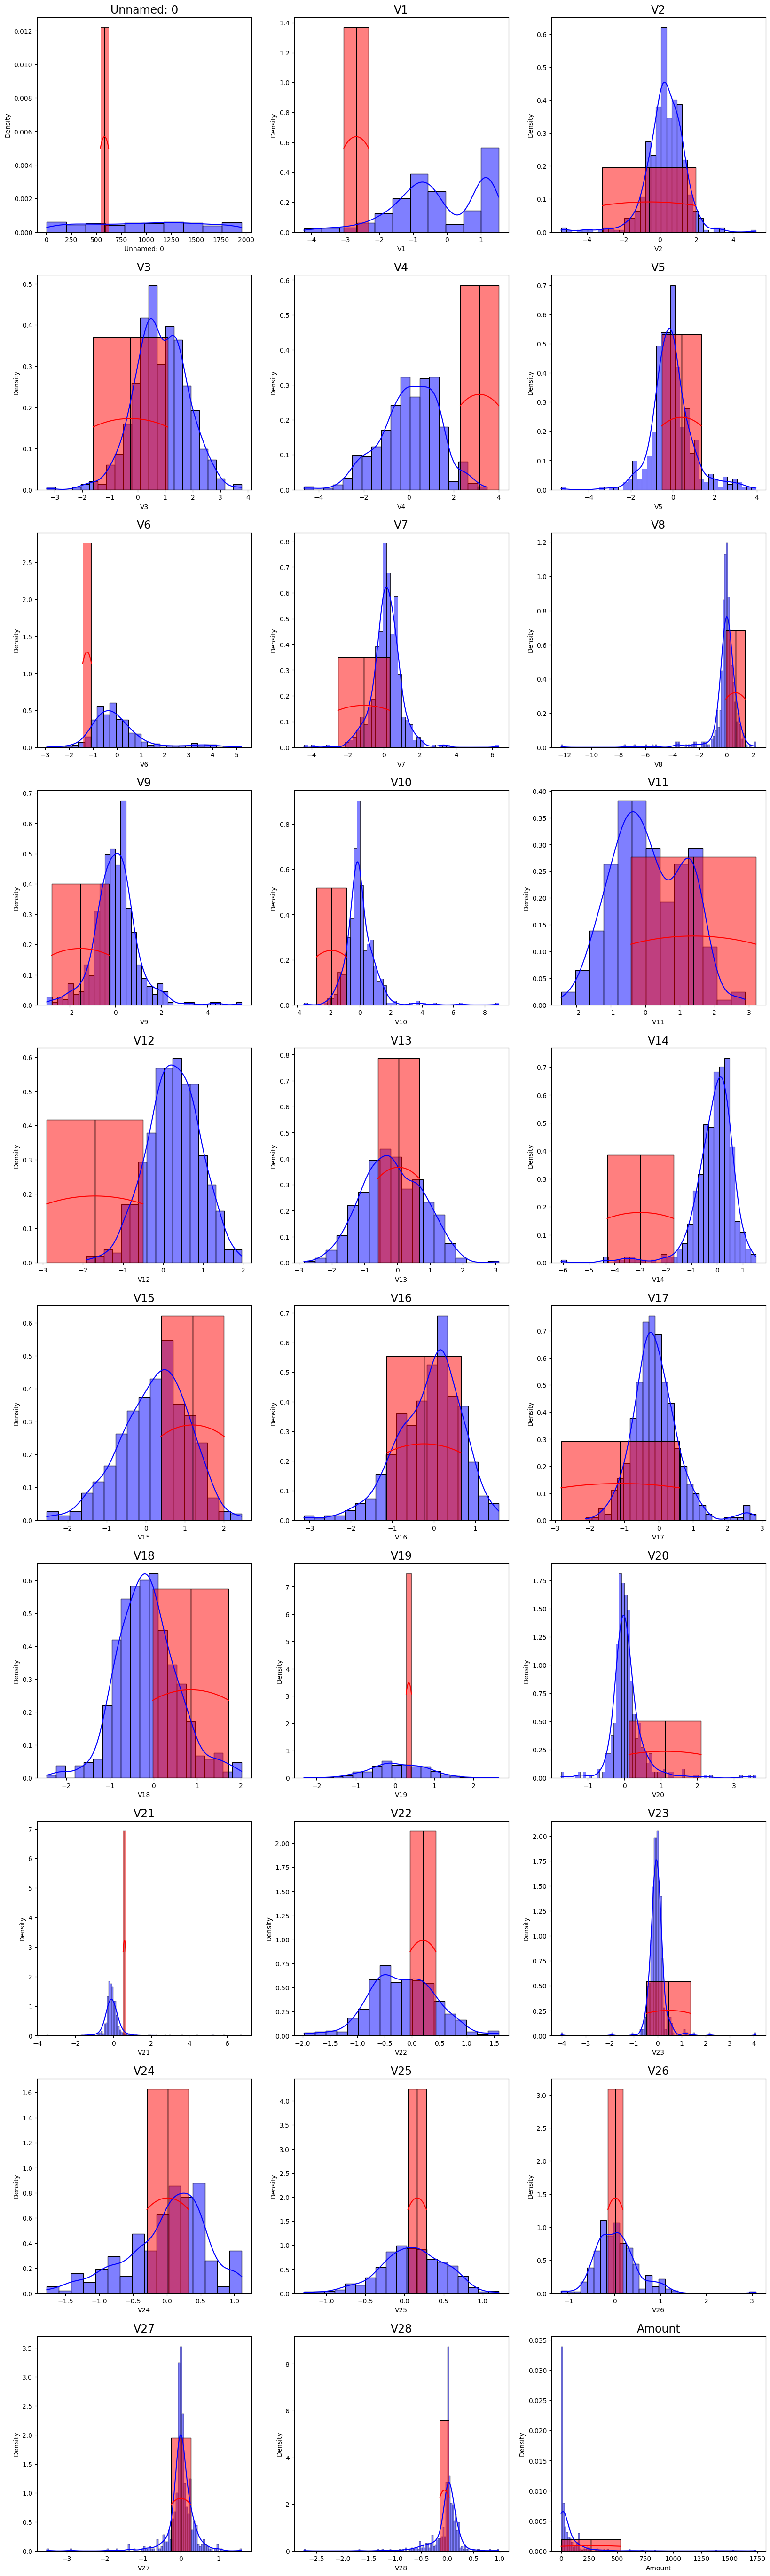

In [41]:
normal_entries = new_dataset.Class==0
fraud_entries = new_dataset.Class==1

plt.figure(figsize=(20,70))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.histplot(x[col][normal_entries], color='blue', kde = True, stat = 'density')
    sns.histplot(x[col][fraud_entries], color='red', kde = True, stat = 'density')
    plt.title(col, fontsize=17)
plt.show()

In [42]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
pred_test = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
def Plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test,pred_test)
    plt.clf()
    plt.show()

In [44]:
# accuracy on training data
acc_score= round(accuracy_score(y_pred, y_train)*100,2)

In [45]:
print('the accuracy score for training data of our model is :', acc_score)

the accuracy score for training data of our model is : 100.0


In [46]:
y_pred = model.predict(x_test)
acc_score = round(accuracy_score(y_pred, y_test)*100,2)

In [47]:
print('the accuracy score of our model is :', acc_score)

the accuracy score of our model is : 99.19


In [48]:
from sklearn import metrics

In [49]:
score = round(model.score(x_test, y_test)*100,2)
print('score of our model is :', score)

score of our model is : 99.19


In [50]:
class_report = classification_report(y_pred, y_test)
print('classification report of our model: ', class_report)

classification report of our model:                precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       124
         1.0       0.00      0.00      0.00         0

    accuracy                           0.99       124
   macro avg       0.50      0.50      0.50       124
weighted avg       1.00      0.99      1.00       124



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
